# Importing Required Packages

In [2]:
!pip install tensorflow
!pip install llama_index
!pip install opencv-python

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.impute import SimpleImputer
import plotly.express as px
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')



# Read Dataset

In [123]:
data = pd.read_csv('loan_data.csv')

In [124]:
data.shape

(1413701, 158)

In [127]:
data['TARGET'].value_counts()

TARGET
0    1291341
1     122360
Name: count, dtype: int64

In [129]:
# Displaying maximum columns and five rows
pd.set_option('display.max_columns', None)
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [131]:
# Copying data to another variable to avoid any changes to original data
copy_data= data.copy()

# Shape of the Dataset

In [133]:
data.shape

(1413701, 158)

**Insights:**
Insights: The dataset contains 1,413,701 records with 158 features, including numerical, categorical, and possibly target variables. Its size and complexity indicate suitability for large-scale analyses such as machine learning or statistical modeling.

# Data Type

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB



**Insights:**

***Size:*** 1,413,701 records, 158 columns.

***Data Types:*** 32 categorical, 80 float, 46 integer.

***Memory:*** 1.7+ GB, can be optimized with type conversions.

***Key Notes:*** Requires encoding for categorical data; missing values need review.

# Summary Statistics of the dataset

In [142]:
data.describe(exclude=['object'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START_y,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413608e+06,1.412493e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,476495.000000,1413701.0,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,616842.000000,1.411880e+06,1.171859e+06,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,701703.000000,589393.000000,729019.000000,476444.000000,428502.000000,664485.000000,706919.000000,715193.000000,457041.000000,576528.000000,449351.000000,709301.000000,434055.000000,638143.000000,736160.000000,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.413701e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.413701e+06,1.106483e+06,1.413701e+06,1.413700e+06,6.641610e+05,1.094176e+06,1.413701e+06,1.413701e+06,664161.000000,4791.000000,4791.000000,1.413701e+06,1.413701e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.784813e+05,8.

In [143]:
data.describe(include=['object'])

,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START_x,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,NAME_CONTRACT_TYPE_y,WEEKDAY_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
count,1413701,1413701,1413701,1413701,1410175,1413701,1413701,1413701,1413701,956121,1413701,1413701,449327,709535,700315,748350,1413701,1413701,1413701,1413701,1413701,1413701,1413701,719029,1413701,1413701,1413701,1413701,1413701,1413701,1413701,1413388
unique,2,3,2,2,7,7,5,5,6,18,7,58,4,3,7,2,4,7,2,25,4,4,9,7,4,27,5,3,8,11,5,17
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No,Cash loans,WEDNESDAY,Y,XAP,Approved,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,POS,XNA,Credit and cash offices,XNA,XNA,Cash
freq,1307115,955139,937176,1024092,1154378,724089,1037902,910910,1264952,251299,248632,304889,341881,696547,303912,737033,626764,215519,1406387,786937,886099,882700,1145533,427635,1037682,797209,592460,900053,600342,715322,429198,235101


# Analyze missing values

In [145]:
# Null Summary

null_summary = pd.DataFrame({
    'Null Count': data.isnull().sum(),
    'Null Percentage': data.isnull().sum() / len(data) * 100
})

print(null_summary)

                           Null Count  Null Percentage
SK_ID_CURR                          0         0.000000
TARGET                              0         0.000000
NAME_CONTRACT_TYPE_x                0         0.000000
CODE_GENDER                         0         0.000000
FLAG_OWN_CAR                        0         0.000000
...                               ...              ...
DAYS_FIRST_DUE                 561106        39.690571
DAYS_LAST_DUE_1ST_VERSION      561106        39.690571
DAYS_LAST_DUE                  561106        39.690571
DAYS_TERMINATION               561106        39.690571
NFLAG_INSURED_ON_APPROVAL      561106        39.690571

[158 rows x 2 columns]


In [146]:
# checking duplicates
duplicates = data[data.duplicated()]

print(f"Number of duplicate rows: {len(duplicates)}")

Number of duplicate rows: 0


# Data Preprocessing:

Numerical Column Analysis and Outlier Handling

In [149]:
# Identify numerical columns excluding 'TARGET'
numerical = data.select_dtypes(include=['number']).columns
numerical = numerical.drop('TARGET') 

data[numerical] = data[numerical].fillna(data[numerical].mean())

# Detect outliers using the IQR method for numerical columns
numerical_data = data[numerical]
Q1 = numerical_data.quantile(0.25)
Q3 = numerical_data.quantile(0.75)
IQR = Q3 - Q1

# Capping outliers for numerical columns
data[numerical] = numerical_data.apply(
    lambda x: x.clip(lower=Q1[x.name] - 1.5 * IQR[x.name], upper=Q3[x.name] + 1.5 * IQR[x.name])
)

print(f"Data shape after processing numerical columns (excluding TARGET): {data.shape}")

print("Value counts for TARGET column:")
print(data['TARGET'].value_counts())

Data shape after processing numerical columns (excluding TARGET): (1413701, 158)
Value counts for TARGET column:
TARGET
0    1291341
1     122360
Name: count, dtype: int64


Handling Missing Values and Limiting Categories

In [151]:
categorical = data.select_dtypes(include=['object', 'category']).columns

# missing values for categorical columns
for col in categorical:
    if not data[col].mode().empty:
        data[col] = data[col].fillna(data[col].mode().iloc[0])
    else:
        data[col] = data[col].fillna('Unknown')  # Replace NaN with 'Unknown'

# Limit the number of categories
max_categories = 20
for col in categorical:
    top_categories = data[col].value_counts().index[:max_categories]
    data[col] = data[col].where(data[col].isin(top_categories), 'Other')

print(f"Data shape after processing categorical columns: {data.shape}")


Data shape after processing categorical columns: (1413701, 158)


# Days to Years type change

In [153]:
data['DAYS_BIRTH'] = abs(data['DAYS_BIRTH']) // 365
data['DAYS_EMPLOYED'] = abs(data['DAYS_EMPLOYED']) // 365
data['DAYS_REGISTRATION'] = abs(data['DAYS_REGISTRATION']) // 365
data['DAYS_ID_PUBLISH'] = abs(data['DAYS_ID_PUBLISH']) // 365

#  Exploratory Data Analysis (EDA):

In [155]:
data.drop(columns=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_10',
                   'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
                   'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20'],inplace=True)

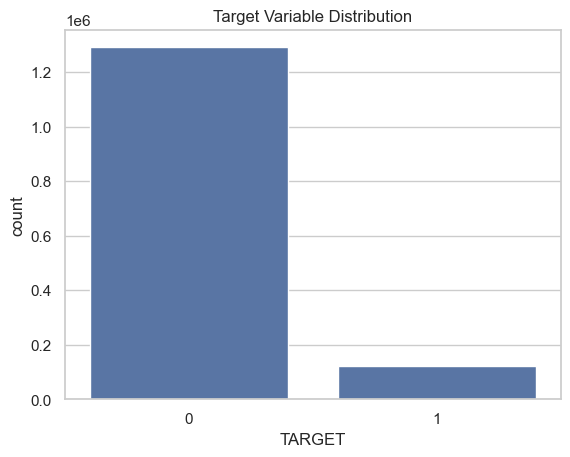

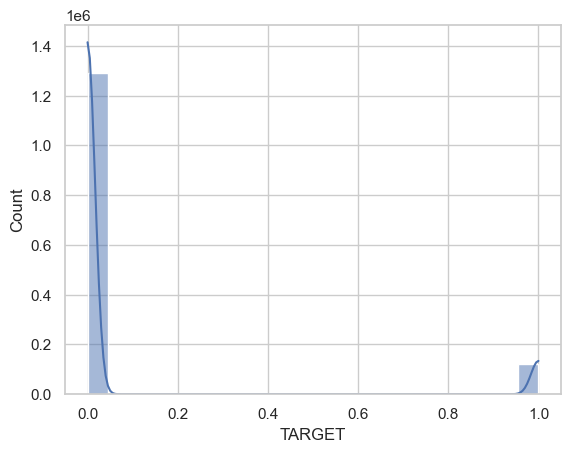

In [156]:
# Visualize distribution of the target variable (TARGET)
sns.countplot(x='TARGET', data=data)
plt.title("Target Variable Distribution")
plt.show()

# Visualizing Distributions:
sns.histplot(data['TARGET'], kde=True)
plt.show()


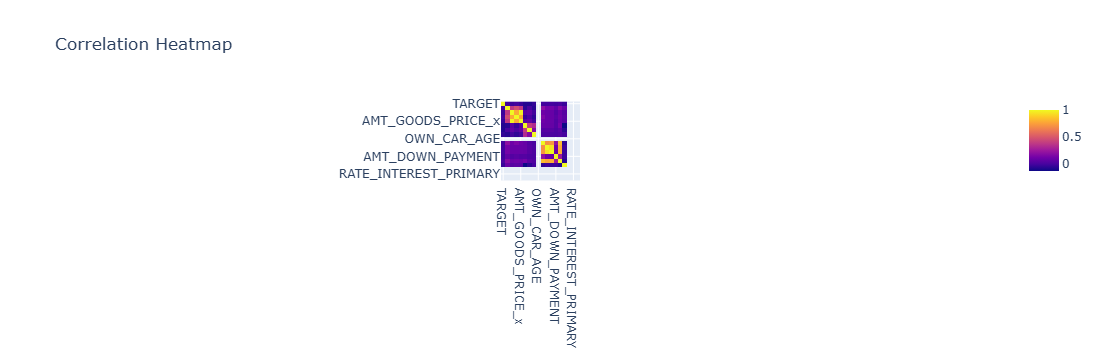

In [157]:
import plotly.express as px

columns_of_interest = [
    'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
    'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 
    'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 
    'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_DOWN_PAYMENT', 
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS', 
    'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY'
]

numerical_filter = data[columns_of_interest].select_dtypes(include=['number'])

corr_matrix = numerical_filter.corr()
fig = px.imshow(corr_matrix, title="Correlation Heatmap")
fig.show()


In [158]:
# Displaying maximum columns and five rows
pd.set_option('display.max_columns', None)
data.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_9,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,25,1,9.0,5,12.011952,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.505499,0.262949,0.139376,0.044033,0.082016,0.9722,0.749643,0.043406,0.00,0.121663,0.0833,0.228792,0.056829,0.098862,0.0247,0.006337,0.0000,0.041887,0.082593,0.9722,0.757051,0.041537,0.0000,0.128117,0.088917,0.225144,0.054096,0.103755,0.025425,0.007636,0.0,0.040385,0.081673,0.9722,0.752989,0.043396,0.00,0.122368,0.083832,0.228543,0.057767,0.100028,0.024419,0.006773,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,0.0,2.0,0.0,-1134.0,1,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.00,179055.00,0.000000,179055.000000,SATURDAY,9.0,Y,1,0.080175,0.189436,0.771284,XAP,Approved,-606,XNA,XAP,Unaccompanied,New,Vehicles,POS,XNA,Stone,214,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.00000
1,100003,0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,45,3,3.0,0,12.011952,1,1,0,1,1,0,Core staff,2.0,2,2,MONDAY,11,0,0,0,0,0,0,School,0.505499,0.622246,0.489699,0.095900,0.082016,0.9851,0.749643,0.043406,0.08,0.121663,0.2917,0.228792,0.056829,0.098862,0.0549,

# Data visualization for Top 10

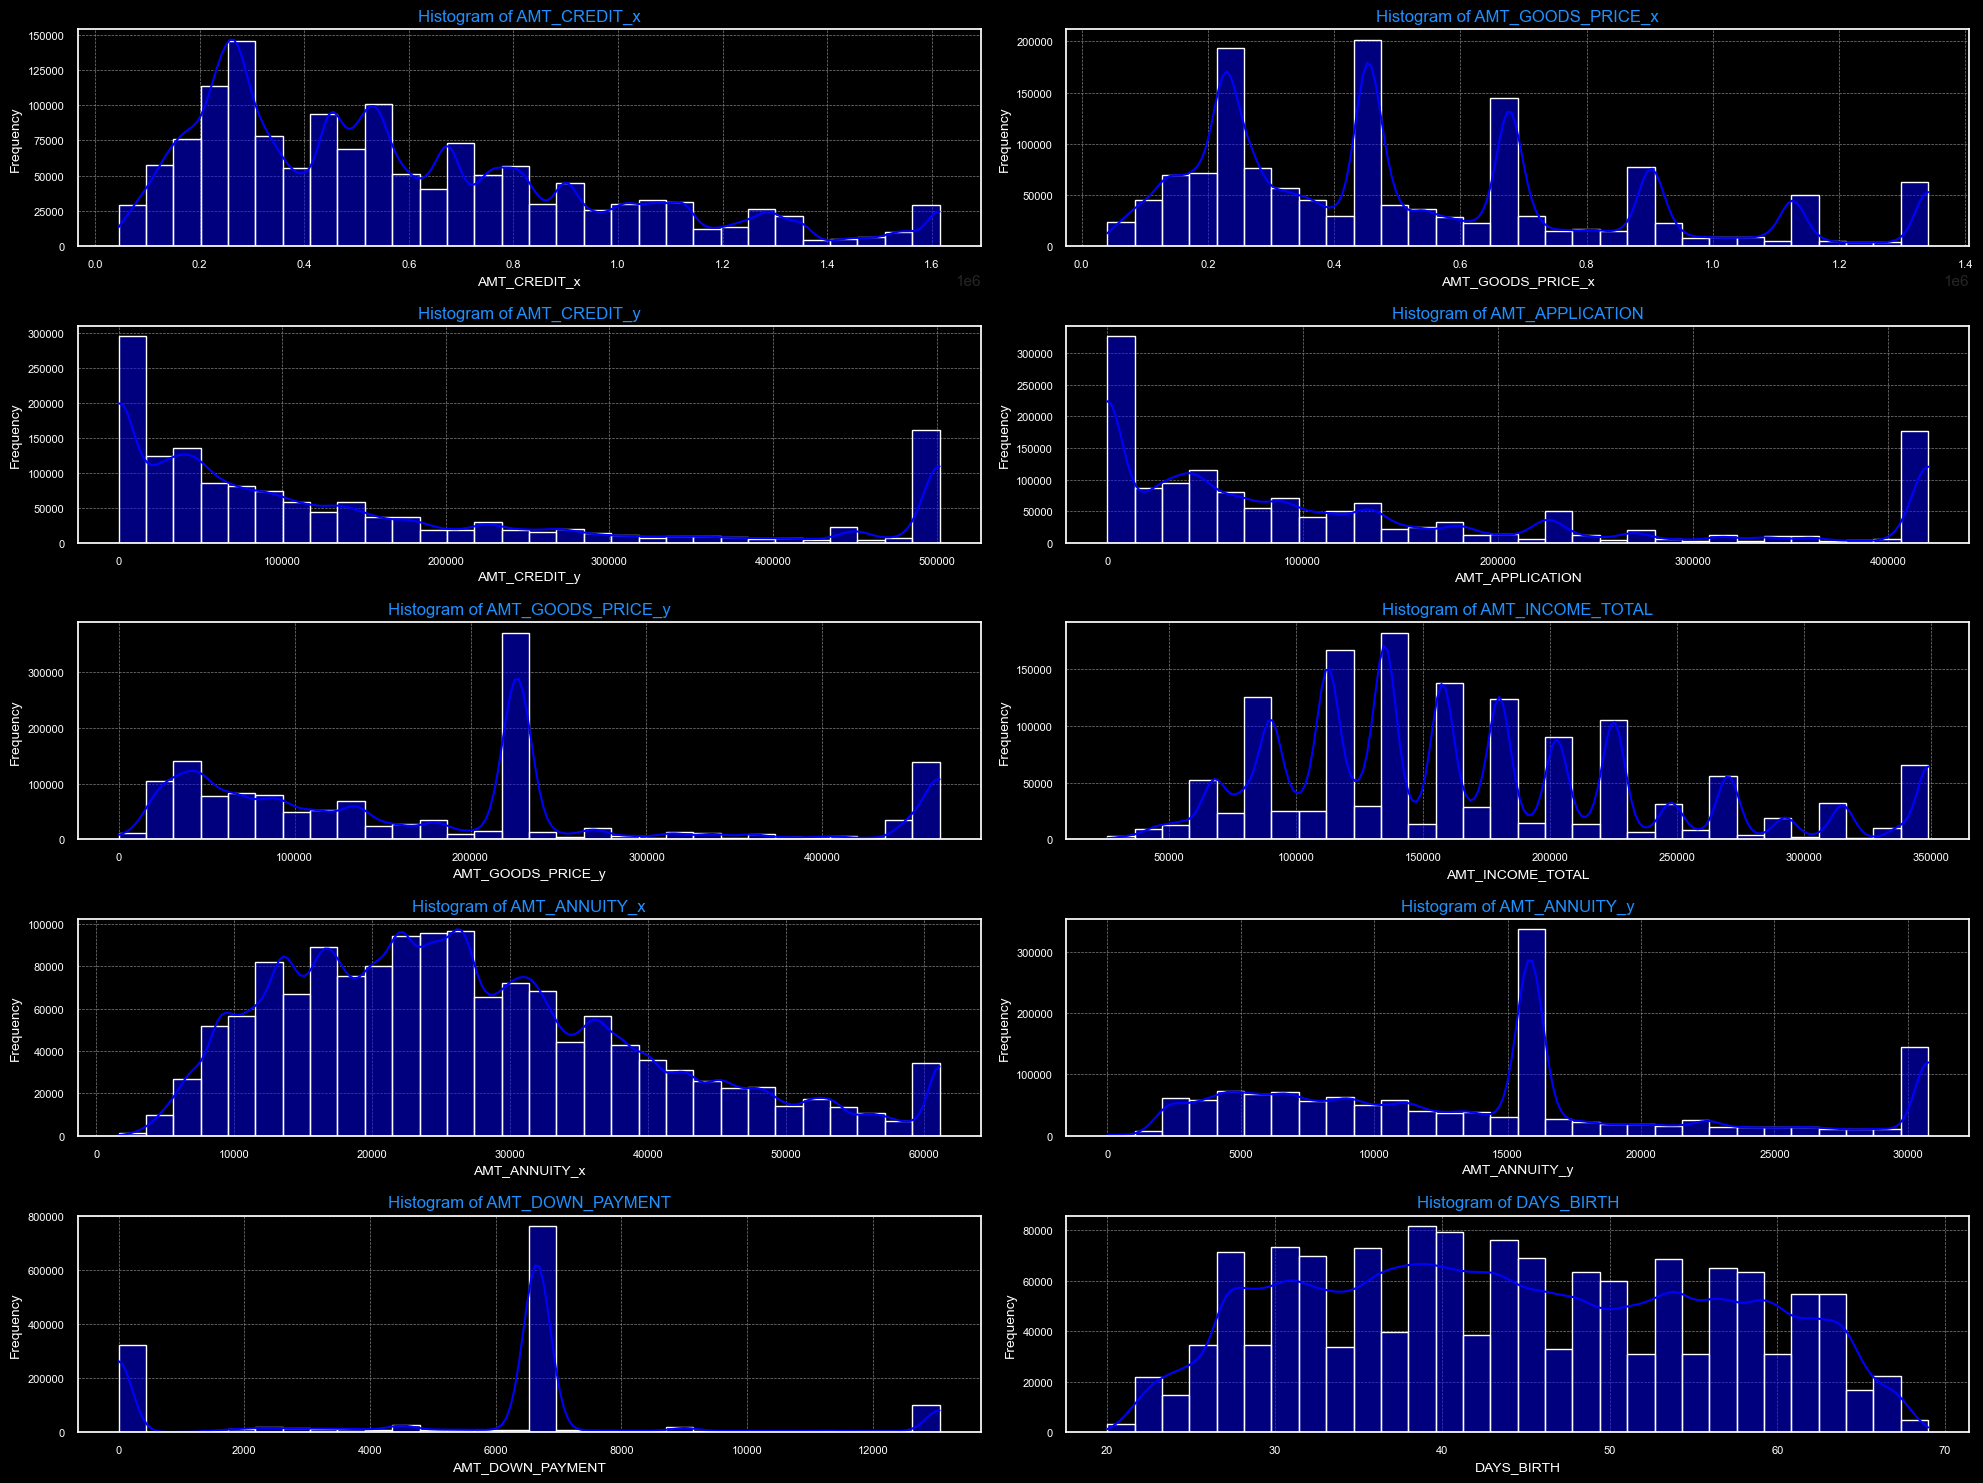

In [171]:
columns_of_interest = [
    'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
    'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 
    'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 
    'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_DOWN_PAYMENT', 
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS', 
    'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY'
]

numerical = data[columns_of_interest].select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical = [col for col in numerical if col != 'TARGET']

# Calculate top 10 columns with the highest variance
top10_cols = data[numerical].var().sort_values(ascending=False).head(10).index.tolist()

# Setting the theme for seaborn plots
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})

# Create the histograms for the top 10 columns with the highest variance
plt.figure(figsize=(20, 15))
for i, col in enumerate(top10_cols, 1):
    plt.subplot(5, 2, i) 
    sns.histplot(data[col], kde=True, bins=30, color='blue')
    plt.title(f'Histogram of {col}', fontsize=12, color='#1E90FF')
    plt.xlabel(col, fontsize=10, color='white')
    plt.ylabel('Frequency', fontsize=10, color='white')
    plt.xticks(color='white', fontsize=8)
    plt.yticks(color='white', fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


In [ ]:
# 1. Handle Skewness (Transformations)

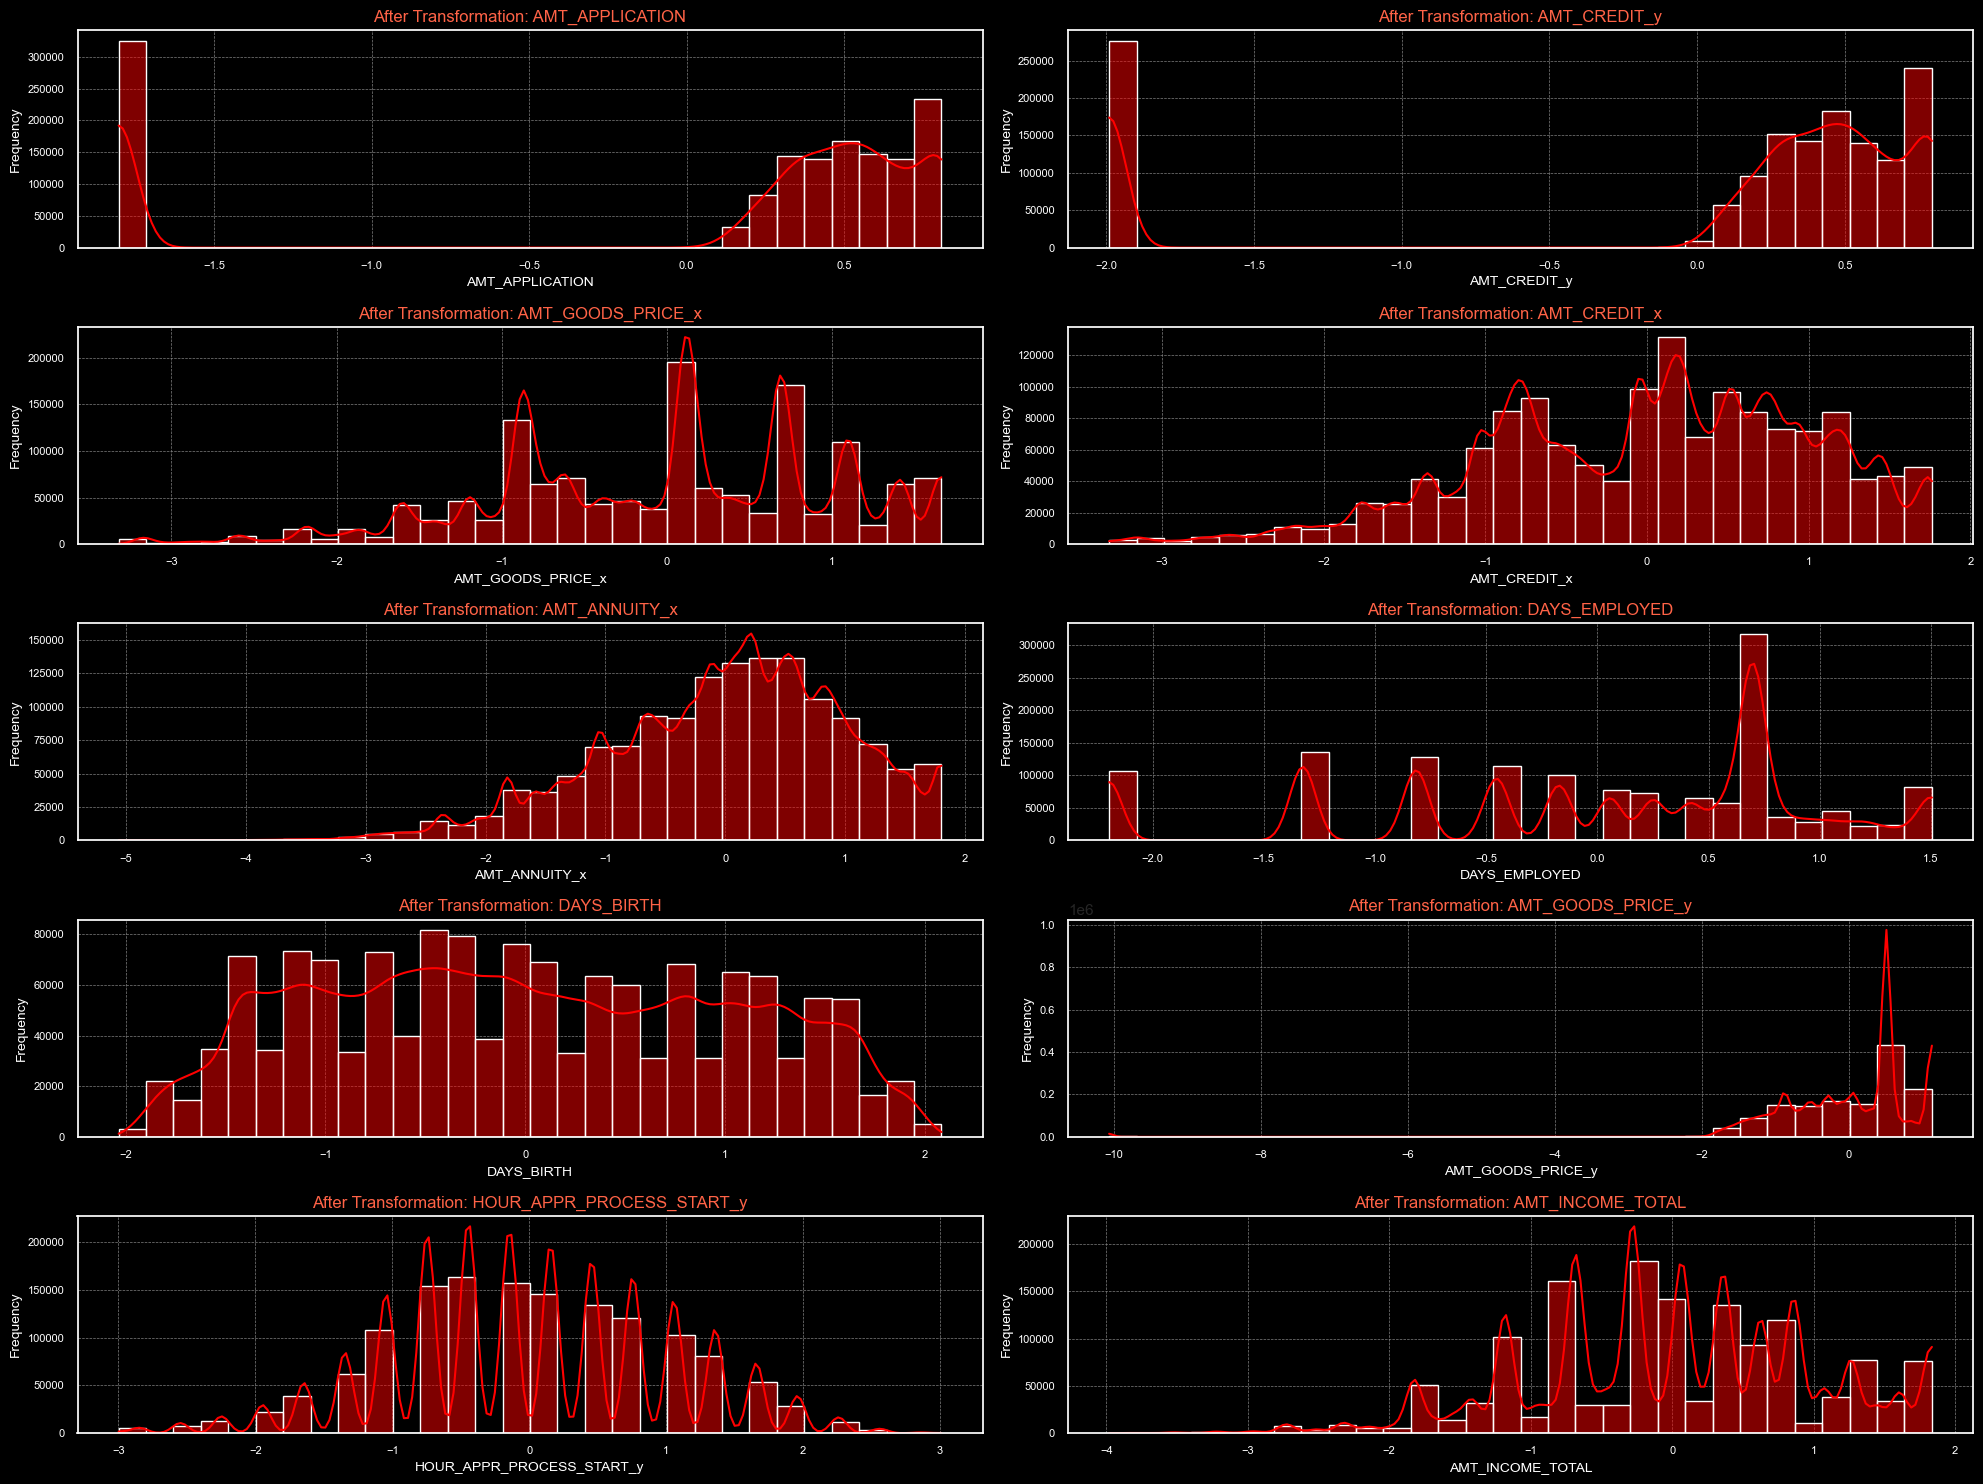

In [172]:
columns_of_interest = [
    'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
    'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 
    'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 
    'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_DOWN_PAYMENT', 
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS', 
    'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY'
]

# Select numerical columns
numerical = data[columns_of_interest].select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical = [col for col in numerical if col != 'TARGET']

# Handle Skewness (Transformations)
skewed_cols = data[numerical].skew()
right_skewed = skewed_cols[skewed_cols > 0.5]
left_skewed = skewed_cols[skewed_cols < -0.5]

# log transformation to right-skewed columns
for col in right_skewed.index:
    data[col] = np.log(data[col] + 1)  # Adding 1 to avoid log(0)

# log transformation to left-skewed columns
for col in left_skewed.index:
    data[col] = np.log(data[col].max() - data[col] + 1)  # Reverse + log

# Scaling the data
scaler = StandardScaler()
data[numerical] = scaler.fit_transform(data[numerical])

# Top 10 columns with the highest variance
top10_cols = data[numerical].var().sort_values(ascending=False).head(10).index.tolist()

# Setting the theme for seaborn plots
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})

# Create the histograms for the top 10 columns with the highest variance
plt.figure(figsize=(20, 15))
for i, col in enumerate(top10_cols, 1):
    plt.subplot(5, 2, i) 
    sns.histplot(data[col], kde=True, bins=30, color='red')
    plt.title(f'After Transformation: {col}', fontsize=12, color='#FF6347')
    plt.xlabel(col, fontsize=10, color='white')
    plt.ylabel('Frequency', fontsize=10, color='white')
    plt.xticks(color='white', fontsize=8)
    plt.yticks(color='white', fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


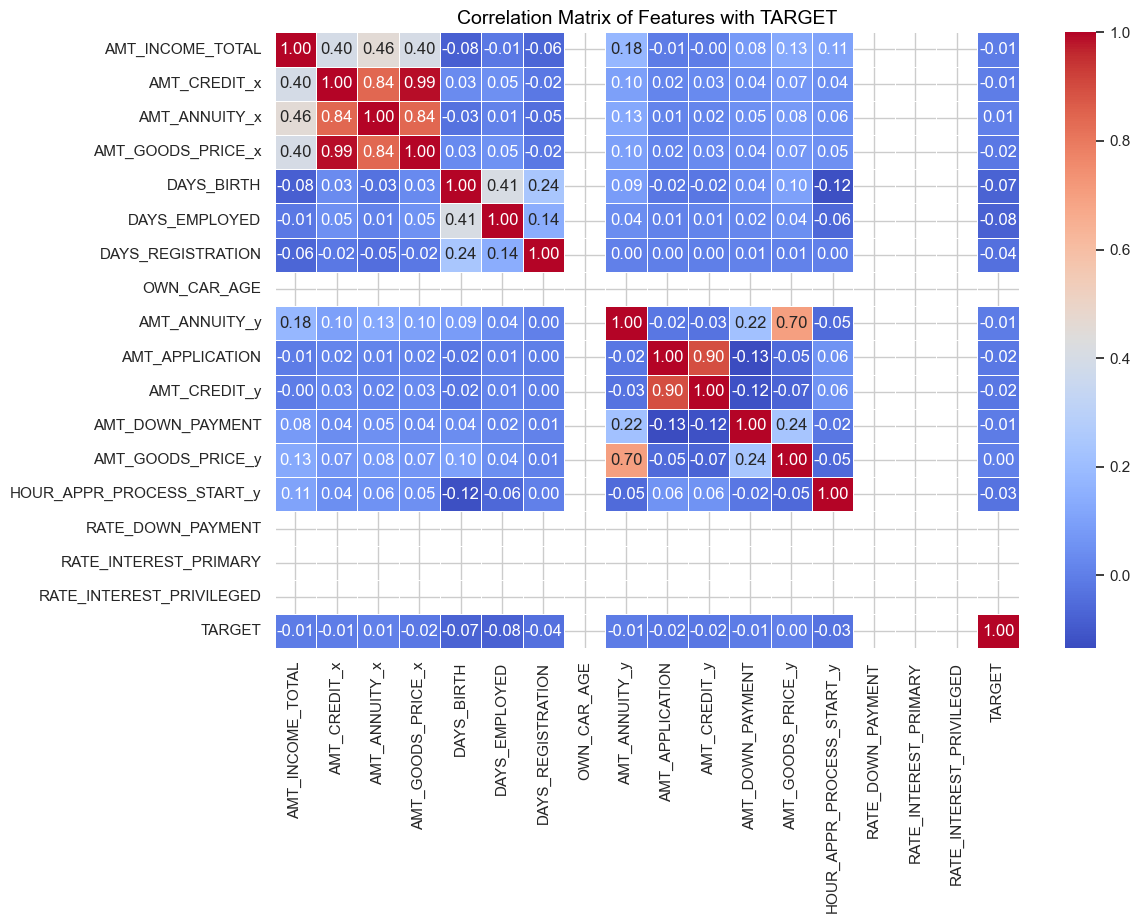

In [177]:
columns_of_interest = [
    'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 
    'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 
    'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'OWN_CAR_AGE', 'OCCUPATION_TYPE', 
    'WEEKDAY_APPR_PROCESS_START_x', 'ORGANIZATION_TYPE', 'AMT_ANNUITY_y', 'AMT_APPLICATION', 
    'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE_y', 'WEEKDAY_APPR_PROCESS_START_y', 
    'HOUR_APPR_PROCESS_START_y', 'FLAG_LAST_APPL_PER_CONTRACT', 'RATE_DOWN_PAYMENT', 
    'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CONTRACT_STATUS', 
    'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_GOODS_CATEGORY'
]

# Select numerical columns (including columns_of_interest and excluding 'TARGET')
numerical = data[columns_of_interest].select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set_theme(style='whitegrid', rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
columns_for_corr = numerical + ['TARGET']
corr_matrix = data[columns_for_corr].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features with TARGET', fontsize=14, color='black')
plt.show()

# Income Distribution

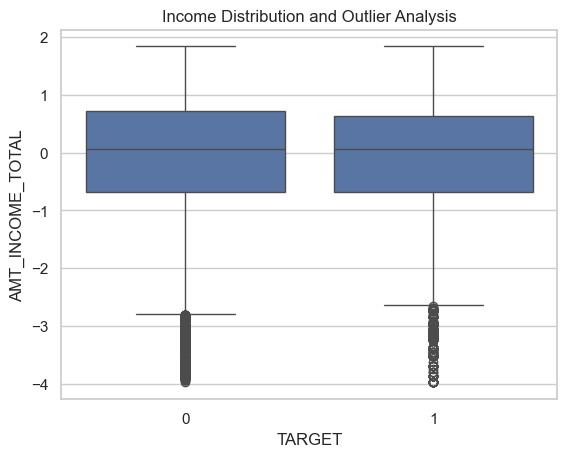

In [179]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=data)
plt.title('Income Distribution and Outlier Analysis')
plt.show()


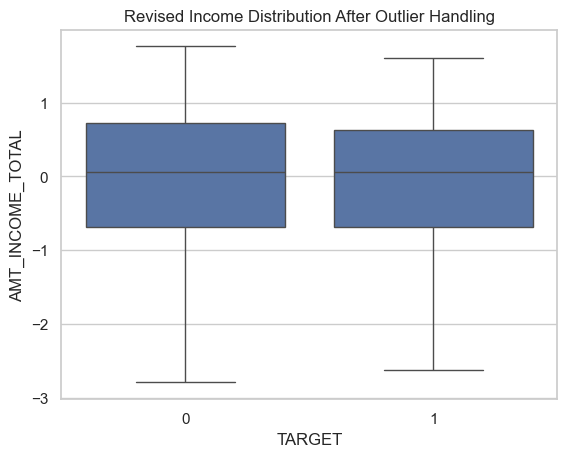

Descriptive Statistics (TARGET = 0):
count    1.286976e+06
mean     1.002513e-02
std      9.809762e-01
min     -2.794586e+00
25%     -6.846124e-01
50%      6.527174e-02
75%      7.222827e-01
max      1.763832e+00
Name: AMT_INCOME_TOTAL, dtype: float64

Descriptive Statistics (TARGET = 1):
count    121507.000000
mean         -0.015881
std           0.917124
min          -2.632235
25%          -0.684612
50%           0.065272
75%           0.625369
max           1.610070
Name: AMT_INCOME_TOTAL, dtype: float64


In [180]:

def handle_outliers(df, col, z_threshold=3, iqr_multiplier=1.5, cap_percentile=0.95):
    # 1. Remove outliers using Z-Score
    df['z_score'] = zscore(df[col])
    df = df[df['z_score'].abs() <= z_threshold]
    
    # 2. Remove outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - iqr_multiplier * IQR) & (df[col] <= Q3 + iqr_multiplier * IQR)]
    
    # 3. Cap extreme values at a defined percentile
    cap_value = df[col].quantile(cap_percentile)
    df[col] = np.clip(df[col], None, cap_value)
    
    # Drop the z-score column as it's not needed further
    df = df.drop(columns=['z_score'])
    
    return df

# Apply outlier handling separately for each TARGET group
target_0_data = data[data['TARGET'] == 0].copy()
target_1_data = data[data['TARGET'] == 1].copy()

# Handle outliers for both groups
target_0_data = handle_outliers(target_0_data, 'AMT_INCOME_TOTAL')
target_1_data = handle_outliers(target_1_data, 'AMT_INCOME_TOTAL')

# Combine the cleaned data
cleaned_data = pd.concat([target_0_data, target_1_data])

# Visualize the result with a boxplot
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=cleaned_data)
plt.title('Revised Income Distribution After Outlier Handling')
plt.show()

# (Optional) Print descriptive statistics for comparison
print("Descriptive Statistics (TARGET = 0):")
print(target_0_data['AMT_INCOME_TOTAL'].describe())
print("\nDescriptive Statistics (TARGET = 1):")
print(target_1_data['AMT_INCOME_TOTAL'].describe())


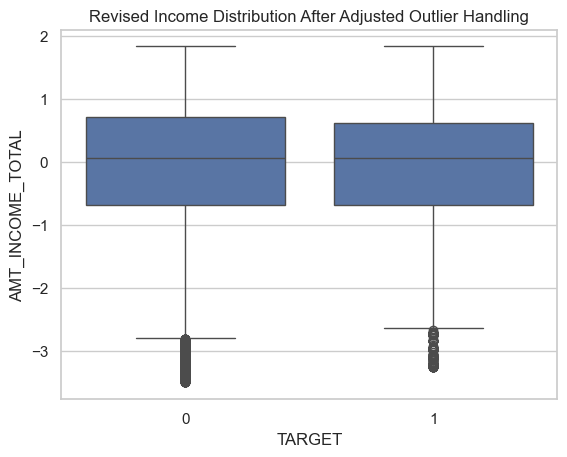

Descriptive Statistics After Adjustments (TARGET = 0):
count    1.290347e+06
mean     5.327028e-03
std      9.985668e-01
min     -3.496272e+00
25%     -6.846124e-01
50%      6.527174e-02
75%      7.222827e-01
max      1.836910e+00
Name: AMT_INCOME_TOTAL, dtype: float64

Descriptive Statistics After Adjustments (TARGET = 1):
count    122242.000000
mean         -0.023212
std           0.958370
min          -3.252041
25%          -0.684612
50%           0.065272
75%           0.625369
max           1.836910
Name: AMT_INCOME_TOTAL, dtype: float64


In [181]:
# Updated function for more careful handling
def handle_outliers_v2(df, col, z_threshold=3.5, iqr_multiplier=2, cap_percentile=0.99):
    # 1. Remove outliers using Z-Score
    df['z_score'] = zscore(df[col])
    df = df[df['z_score'].abs() <= z_threshold]
    
    # 2. Remove outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - iqr_multiplier * IQR) & (df[col] <= Q3 + iqr_multiplier * IQR)]
    
    # 3. Cap extreme values at a higher percentile
    cap_value = df[col].quantile(cap_percentile)
    df[col] = np.clip(df[col], None, cap_value)
    
    # Drop the z-score column as it's not needed further
    df = df.drop(columns=['z_score'])
    
    return df

# Reapply the function with adjusted thresholds
target_0_data = handle_outliers_v2(data[data['TARGET'] == 0].copy(), 'AMT_INCOME_TOTAL')
target_1_data = handle_outliers_v2(data[data['TARGET'] == 1].copy(), 'AMT_INCOME_TOTAL')

# Combine the cleaned data
cleaned_data_v2 = pd.concat([target_0_data, target_1_data])

# Visualize the result
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=cleaned_data_v2)
plt.title('Revised Income Distribution After Adjusted Outlier Handling')
plt.show()

# Compare descriptive statistics
print("Descriptive Statistics After Adjustments (TARGET = 0):")
print(target_0_data['AMT_INCOME_TOTAL'].describe())
print("\nDescriptive Statistics After Adjustments (TARGET = 1):")
print(target_1_data['AMT_INCOME_TOTAL'].describe())

# Distribution of Loan Credit Amount

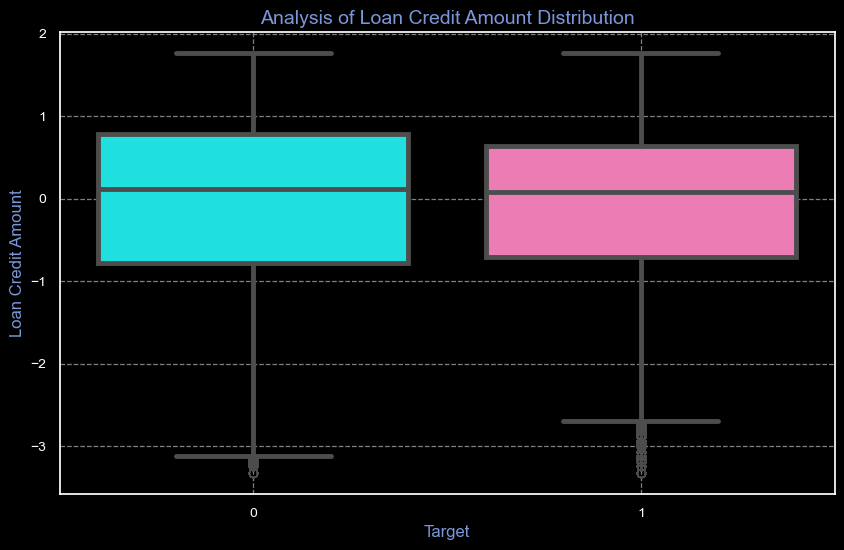

In [183]:
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})

plt.figure(figsize=(10, 6))
sns.boxplot(
    x='TARGET',
    y='AMT_CREDIT_x',
    data=data,
    palette={'0': '#00FFFF', '1': '#FF69B4'},  # Bright cyan for 0 and pink for 1
    linewidth=3.5
)


plt.title('Analysis of Loan Credit Amount Distribution', fontsize=14, color='#7A97D8')
plt.xlabel('Target', fontsize=12, color='#7A97D8')
plt.ylabel('Loan Credit Amount', fontsize=12, color='#7A97D8')
plt.xticks(color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.9)
plt.show()


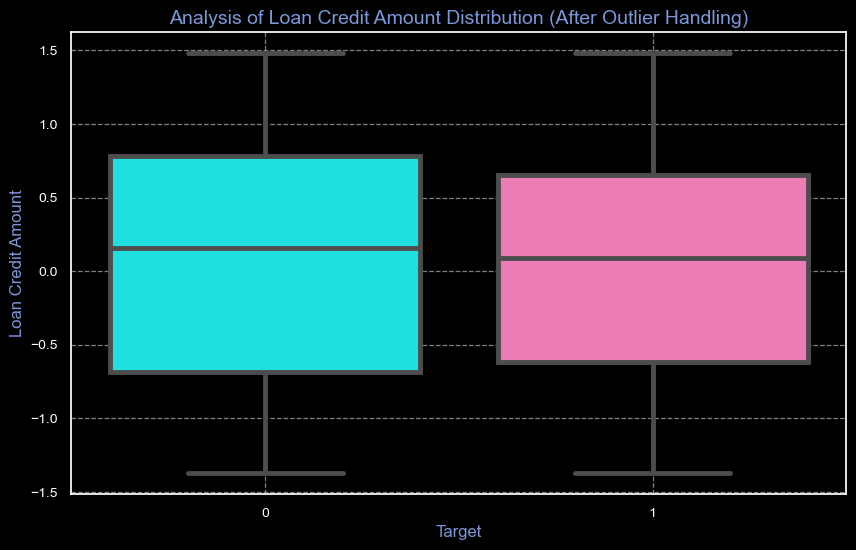

In [184]:
# Handling Outliers Separately for Each TARGET Class
for target_class in [0, 1]:
    target_data = data[data['TARGET'] == target_class].copy()
    
    # Isolation Forest for Initial Outlier Detection
    iso = IsolationForest(contamination=0.01, random_state=42)
    outlier_pred = iso.fit_predict(target_data[['AMT_CREDIT_x']])
    target_data['outlier'] = outlier_pred
    
    # Replace detected outliers (-1) with the median value
    median_value = target_data['AMT_CREDIT_x'].median()
    data.loc[
        (data['TARGET'] == target_class) & 
        (data.index.isin(target_data.index)) & 
        (target_data['outlier'] == -1),
        'AMT_CREDIT_x'
    ] = median_value

# Apply Z-Score Threshold
data['z_score'] = zscore(data['AMT_CREDIT_x'])

# Removing remaining outliers with a stricter Z-score
data = data[data['z_score'].abs() <= 2]

# Quantile-Based Capping
# Cap values above the 95th percentile and below the 5th percentile
lower_cap = data['AMT_CREDIT_x'].quantile(0.05)
upper_cap = data['AMT_CREDIT_x'].quantile(0.95)
data['AMT_CREDIT_x'] = np.clip(data['AMT_CREDIT_x'], lower_cap, upper_cap)

# Drop the z_score column as it's no longer needed
data.drop(columns=['z_score'], inplace=True)

sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='TARGET',
    y='AMT_CREDIT_x',
    data=data,
    palette={'0': '#00FFFF', '1': '#FF69B4'},  # Bright cyan for 0 and pink for 1
    linewidth=3.5
)
plt.title('Analysis of Loan Credit Amount Distribution (After Outlier Handling)', fontsize=14, color='#7A97D8')
plt.xlabel('Target', fontsize=12, color='#7A97D8')
plt.ylabel('Loan Credit Amount', fontsize=12, color='#7A97D8')
plt.xticks(color='white', fontsize=10)
plt.yticks(color='white', fontsize=10)
plt.grid(color='gray', linestyle='--', linewidth=0.9)
plt.show()

# Distribution of Age by TARGET

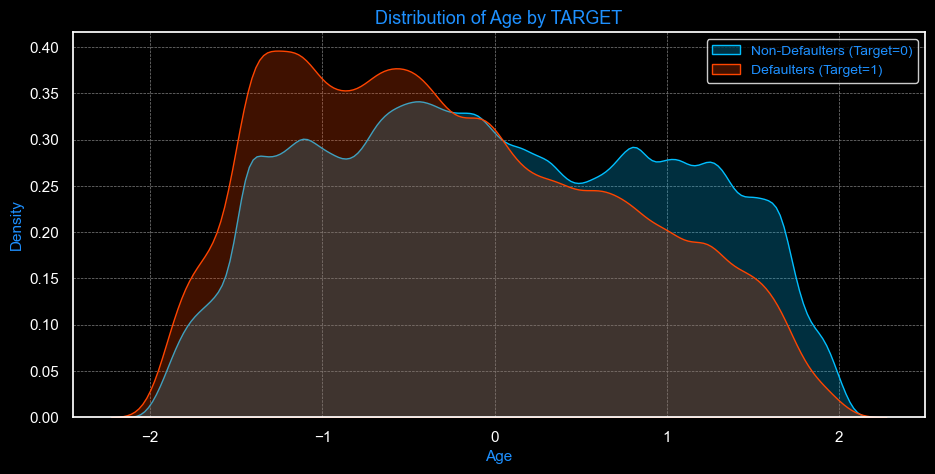

In [191]:
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})

plt.figure(figsize=(11, 5))

# Age grouped by TARGET
sns.kdeplot(
    data=data[data['TARGET'] == 0],
    x='DAYS_BIRTH',
    label='Non-Defaulters (Target=0)',
    fill=True,
    color='#00BFFF'
)
sns.kdeplot(
    data=data[data['TARGET'] == 1],
    x='DAYS_BIRTH',
    label='Defaulters (Target=1)',
    fill=True,
    color='#FF4500'
)

plt.title('Distribution of Age by TARGET', fontsize=13, color='#1E90FF')
plt.legend(facecolor='black', edgecolor='white', fontsize=10, labelcolor='#1E90FF')
plt.xlabel('Age', fontsize=11, color='#1E90FF')
plt.ylabel('Density', fontsize=11, color='#1E90FF')

plt.xticks(color='white')
plt.yticks(color='white')

plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()


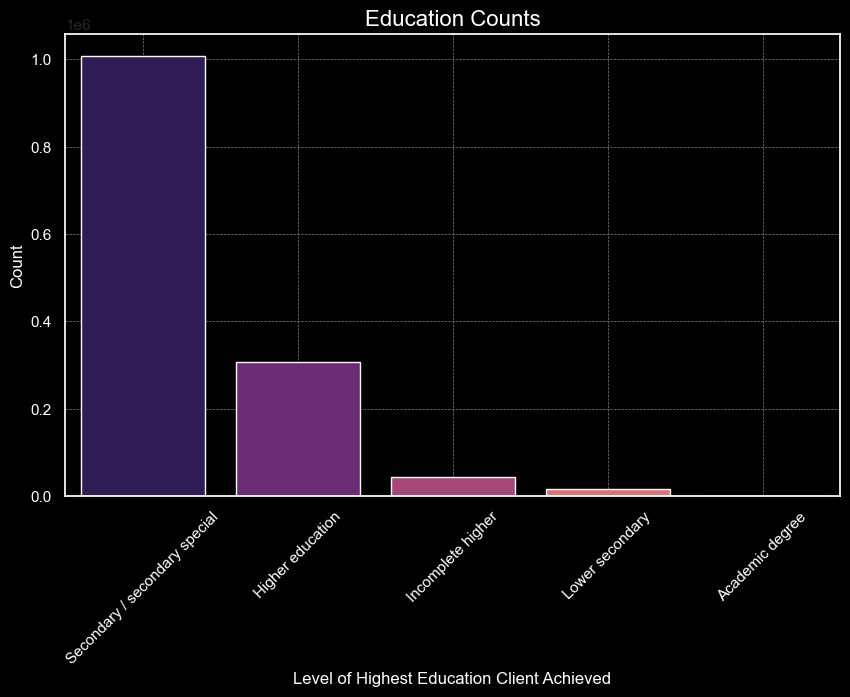

In [193]:
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='NAME_EDUCATION_TYPE',
    order=data['NAME_EDUCATION_TYPE'].value_counts().index,
    palette='magma'
)
plt.title('Education Counts', fontsize=16, color='white')
plt.xlabel('Level of Highest Education Client Achieved', fontsize=12, color='white')
plt.ylabel('Count', fontsize=12, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.5)

plt.show()


# Pie chart - Education Type

In [195]:
pie_data = data['NAME_EDUCATION_TYPE'].value_counts().to_dict()
pie_data.values()
pie_data.keys()

dict_keys(['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree'])

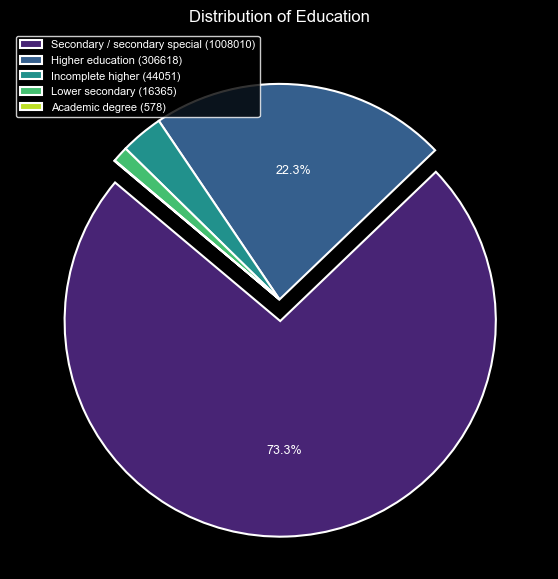

In [197]:
plt.figure(figsize=(18, 7))
plt.gca().set_facecolor('black')
plt.gcf().set_facecolor('black')

colors = plt.cm.viridis([0.1, 0.3, 0.5, 0.7, 0.9])
explode = [0.1 if i == max(pie_data.values()) else 0 for i in pie_data.values()]

def autopct(pct):
    return ('%.1f%%' % pct) if pct > 5 else ''

wedges, texts, autotexts = plt.pie(
    pie_data.values(),
    labels=None,
    autopct=autopct,
    textprops={'color': 'white', 'fontsize': 9},
    colors=colors,
    explode=explode,
    startangle=140,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5}
)

plt.legend(
    loc="best",
    labels=[f"{key} ({value})" for key, value in pie_data.items()],
    fontsize=8,
    facecolor='black',
    edgecolor='white',
    labelcolor='white'
)

plt.title('Distribution of Education', fontsize=12, color='white')
plt.show()


Occupation Type using Countplot

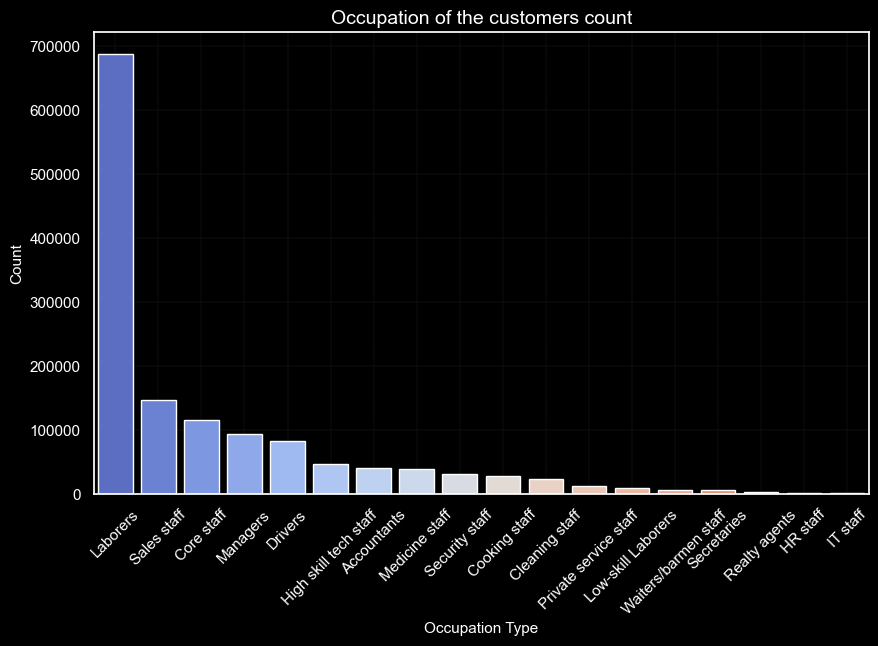

In [200]:
sns.set_theme(style='darkgrid', rc={'axes.facecolor': 'black', 'figure.facecolor': 'black'})
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='OCCUPATION_TYPE',
    order=data['OCCUPATION_TYPE'].value_counts().index,
    palette='coolwarm'
)

plt.title('Occupation of the customers count', fontsize=14, color='white')
plt.xlabel('Occupation Type', fontsize=11, color='white')
plt.ylabel('Count', fontsize=11, color='white')
plt.xticks(rotation=45, color='white')
plt.yticks(color='white')
plt.grid(color='gray', linestyle='--', linewidth=0.1)

plt.show()


# Feature Engineering

In [202]:
data['Credit_Application_Diff'] = data['AMT_CREDIT_x'] - data['AMT_APPLICATION']

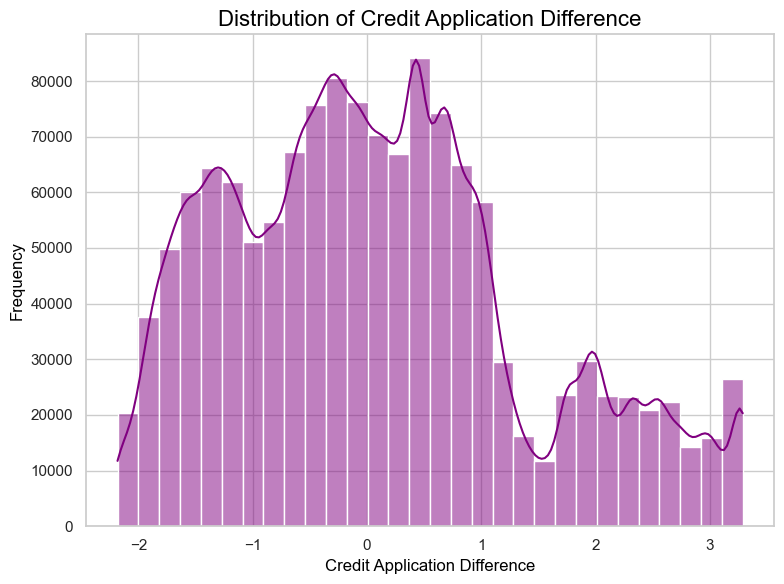

In [205]:
sns.set_theme(style='whitegrid', rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
plt.figure(figsize=(8, 6))
sns.histplot(data['Credit_Application_Diff'], kde=True, bins=30, color='purple')
plt.title('Distribution of Credit Application Difference', fontsize=16, color='black')
plt.xlabel('Credit Application Difference', fontsize=12, color='black')
plt.ylabel('Frequency', fontsize=12, color='black')
plt.tight_layout()
plt.show()


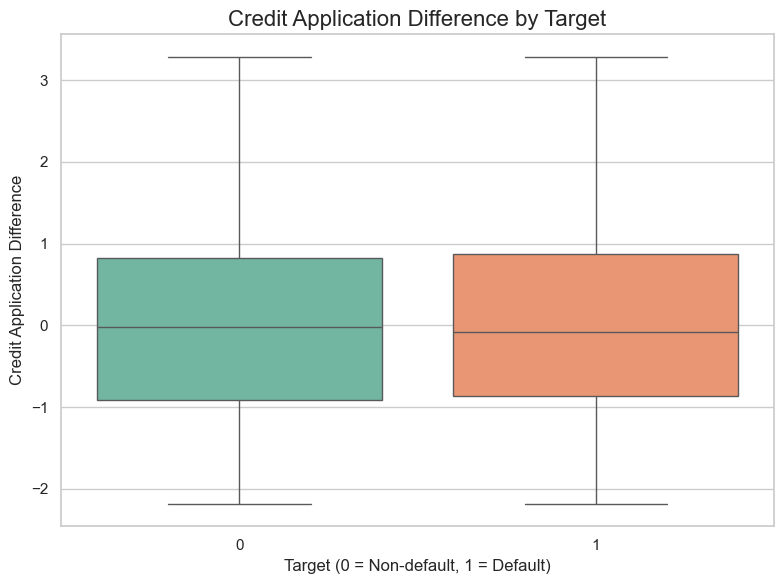

In [207]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['TARGET'], y=data['Credit_Application_Diff'], palette='Set2')
plt.title('Credit Application Difference by Target', fontsize=16)
plt.xlabel('Target (0 = Non-default, 1 = Default)', fontsize=12)
plt.ylabel('Credit Application Difference', fontsize=12)
plt.tight_layout()
plt.show()

# One-Hot Encoding


In [209]:
# Perform One-Hot Encoding
data = pd.get_dummies(data, drop_first=True)

#Output the shape of data after One-Hot Encoding
print(f"Data shape after One-Hot Encoding: {data.shape}")


Data shape after One-Hot Encoding: (1375622, 308)


In [213]:
# Handling Missing values

In [217]:
# Load your data
# Assuming 'data' is your pre-processed DataFrame after encoding

# Check for missing data
missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100

# Summary of missing data
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
print("Summary of Missing Data:")
print(missing_summary)

# Handle missing data

# Drop columns with more than 30% missing values
threshold = 30  # percentage
columns_to_drop = missing_summary[missing_summary['Missing Percentage'] > threshold].index
data = data.drop(columns=columns_to_drop, axis=1)
print(f"Dropped columns: {columns_to_drop.tolist()}")

# Missing values for remaining columns
for column in data.columns:
    if data[column].dtype in ['int64', 'float64']:  # Numeric columns
        #  median
        data[column].fillna(data[column].median(), inplace=True)
    else:  # Categorical columns
        #  mode
        data[column].fillna(data[column].mode()[0], inplace=True)

# Confirm no remaining missing values
print("Remaining Missing Values:", data.isnull().sum().sum())

Summary of Missing Data:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
Dropped columns: []
Remaining Missing Values: 0


# Split Data After Preprocessing

In [219]:
# Split the data into train and test sets
x = data.drop('TARGET', axis=1)
y = data['TARGET']

# Split data into train and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("Training and test sets created successfully!")
print(f"Training set size: {x_train.shape[0]} rows")
print(f"Test set size: {x_test.shape[0]} rows")


Training and test sets created successfully!
Training set size: 1100497 rows
Test set size: 275125 rows


Save Processed Data to Files

In [222]:
# Save to CSV
x_train.to_csv('x_train.csv', index=False)
x_test.to_csv('x_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


Loading Files for Model Training in another file part 2...
